<a href="https://colab.research.google.com/github/Kedree/DataAnalysisUMF/blob/main/HW3/HW3DONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier. 

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # I need this for my own terrible code

matches = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv') # Taking our used car data and storing it for use
matches.head(5) # Confirmation of success

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year. 

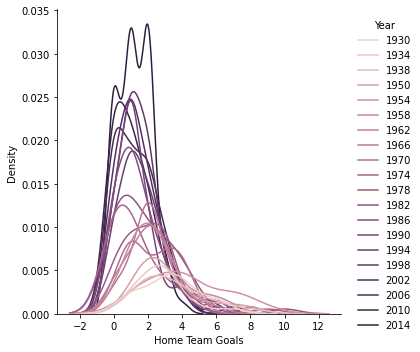

In [ ]:
x = matches['Year'] # Set the x axis data to the years of the matches
y = matches['Home Team Goals'] # Set the y axis data to the number of home team goals

sns.displot(hue=x, x=y, kind='kde') # I was not sure what you wanted so I did density curves for Goals scored by year with the hue according to the year, I hope this is what you desired!


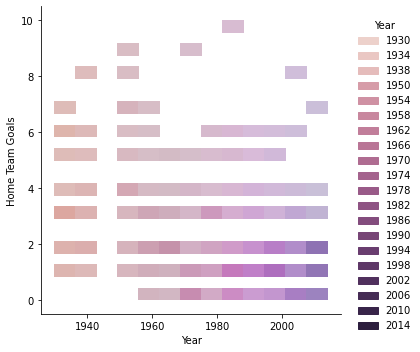

In [ ]:
sns.displot(x=x, y=y, hue=x) # Just in case you wanted the other thing I thought you wanted

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

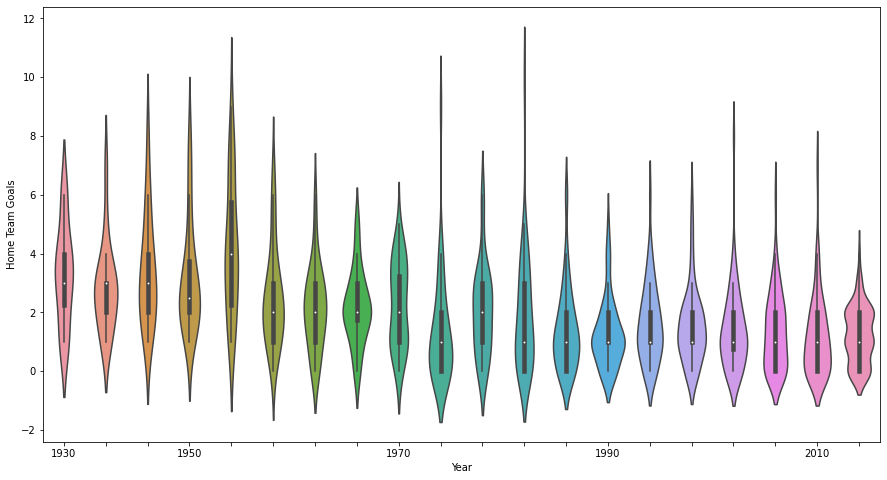

In [ ]:
from matplotlib import rcParams # I imported this so I could change the size of the figures once and for all

rcParams['figure.figsize'] = 15,8 # Changes the size of the figures

a = np.sort(matches['Year'].unique()) # Sorted all unique years
labels = [] # make a list for labels
for year in a: # For every year in the sorted list above:
    if year % 10 != 0: # If it doesn't end in 10 then dont add it
        labels.append("")
    else: # But if it does end in 10 then add it
        labels.append(year)

plot = sns.violinplot(x=x, y=y) # Save our violin plot with Year as the x axis and y as the Home Team Goals
plot.set_xticklabels(labels) # Set the x tick labels as the list made earlier
plot # Show me the plot!

It seems that Home Team goals outliers are sinusoidal, hmm, also the amplitude seems to be getting smaller, I would love to compare this to Away Team Goals

By having Home and Away teams along with their respective years on seperate rows one could create split violins for each year and set the hue to away or home tag, easily comparing each year as well as the interplay between away and home.

Something like this:

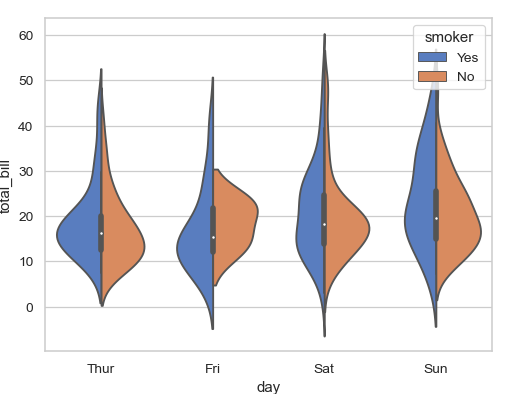

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [ ]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


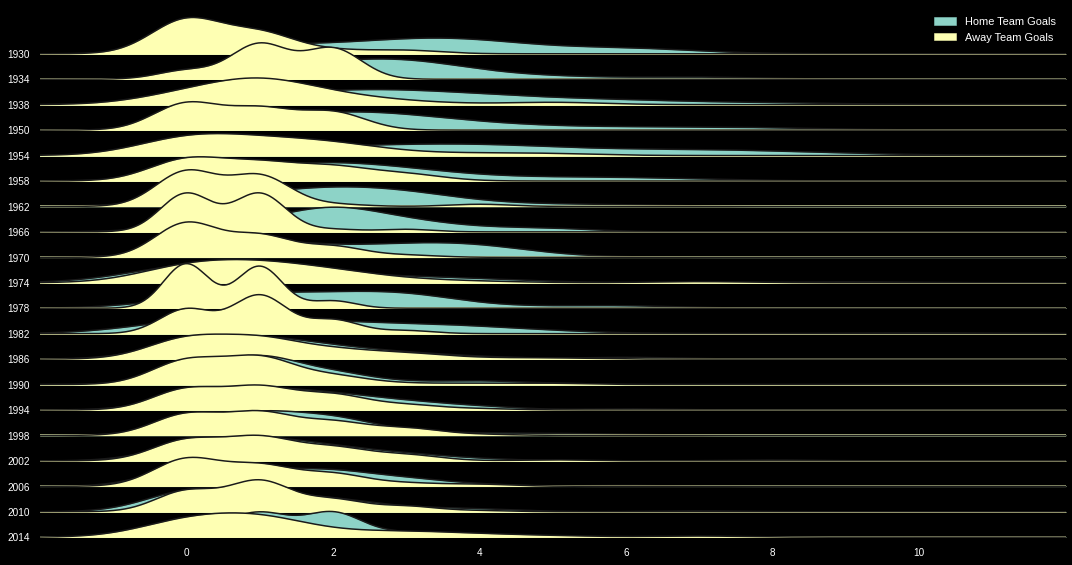

In [208]:
import joypy as jp

subs = matches[['Home Team Goals', 'Away Team Goals', 'Year']] # Give me only the Goals and Years columns
fig, axes = jp.joyplot(subs, by="Year", legend = True, colormap = plt.style.use("dark_background")) # Make a joyplot where the Goals are plotted against each other according to the years, show the legend

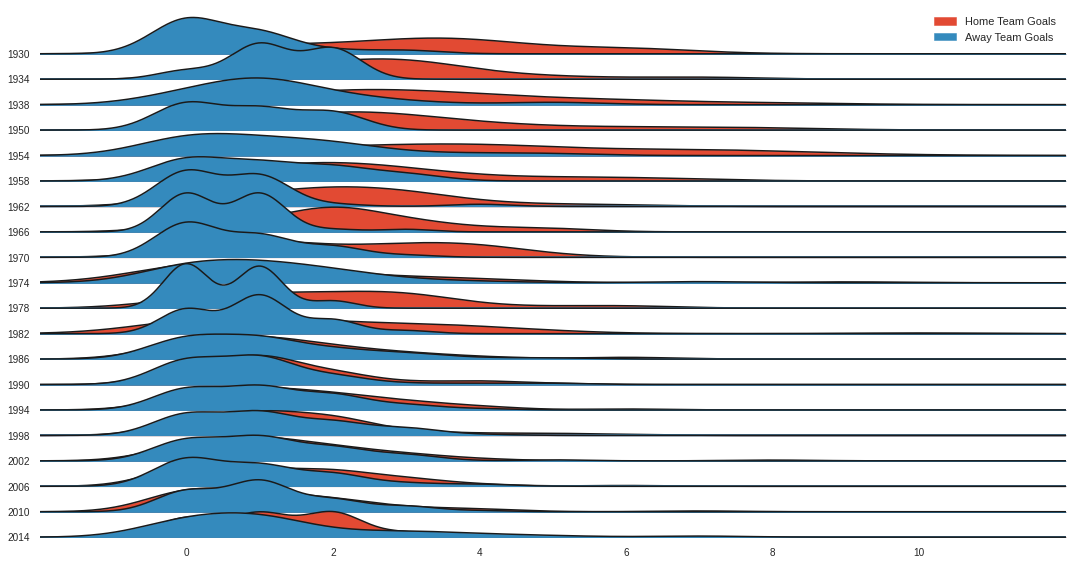

In [205]:
fig, axes = jp.joyplot(subs, by="Year", legend = True, colormap = plt.style.use("seaborn-white")) # Same as above but make it white!

It is obvious that Home team Goals were steadily ahead of Away team until about 1986, 2014 seems to buck that trend

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line. 

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals. 



Text(0.5, 1.0, 'Top Five Home Team Goals by Team')

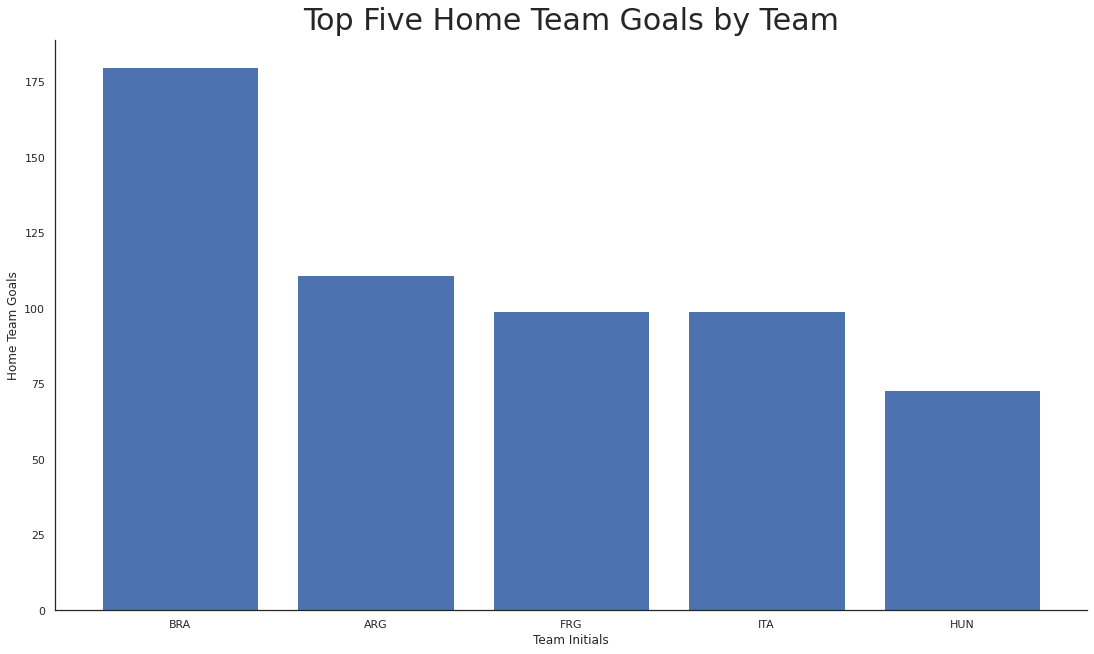

In [ ]:
df2 = (matches[['Home Team Initials', 'Home Team Goals']].groupby(by = ['Home Team Initials']).sum()) # Group the Matches by home team initals and sum the home team goals accordingly
df2 = df2.sort_values(by = ['Home Team Goals'], ascending=False).reset_index() # Sort the values as largest first and reset the index

plt.bar(df2[:5]['Home Team Initials'],df2[:5]['Home Team Goals']) # Bar plot the first 5

ax = plt.gca() # Get the axis

ax.spines['top'].set_visible(False) # Remove the ugly top and right side
ax.spines['right'].set_visible(False)

fig = plt.gcf() # get the figure

fig.set_size_inches(18.5, 10.5) # Set its size to 18.5 x 10.5

ax.set_ylabel("Home Team Goals") # Label the masterpiece
ax.set_xlabel("Team Initials")

plt.title("Top Five Home Team Goals by Team", fontdict={'fontsize': 30}, pad=10) # Title the figure

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



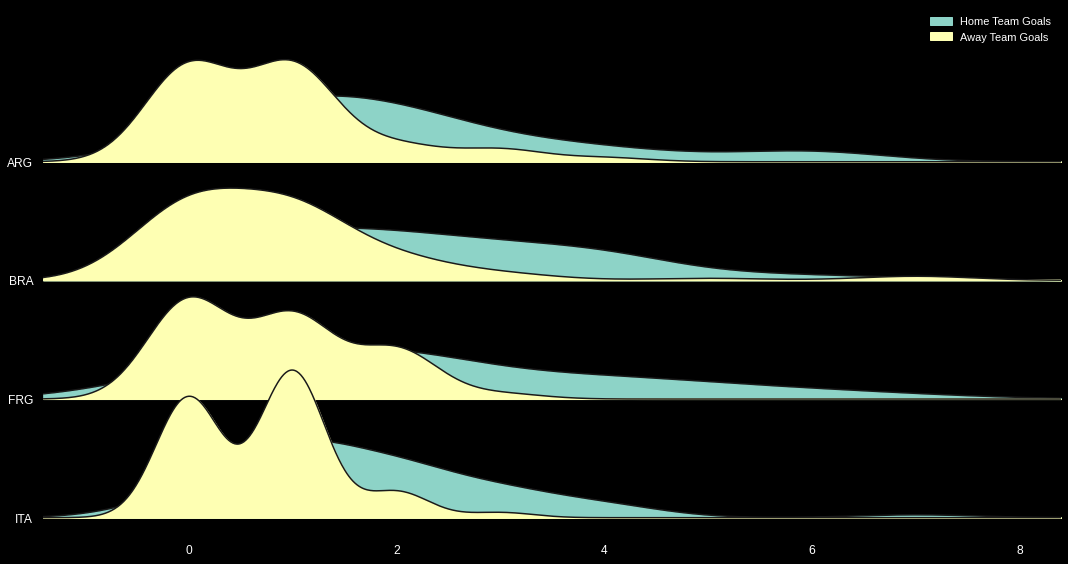

In [189]:
teams = df2[:4]['Home Team Initials'].to_list() # Get the first 4 team initials from before and make it a list

a = [] # Make a temporary list for later

for initials in matches['Home Team Initials']: # for every row in matches (specifically initials in matches)
    if initials in teams: # if the initials are in the top 4 
        a.append(True) # Add a true to the temp list
    else: # Otherwise if they are not top 4 then add a false
        a.append(False) 

subs = matches[a] # Get rid of all non top 4 teams by passing a list of Trues and Falses to matches
subs = subs[['Home Team Goals', 'Away Team Goals', 'Home Team Initials']] # Now trim the new top 4 matches list to just Goals and Home Team initials

fig, axes = jp.joyplot(subs, by="Home Team Initials", legend=True, colormap=plt.style.use("dark_background")) # Plot the goals for the top 4 teams against each other

Our teams are great a beating the away teams!

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [192]:
!pip install seaborn_qqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


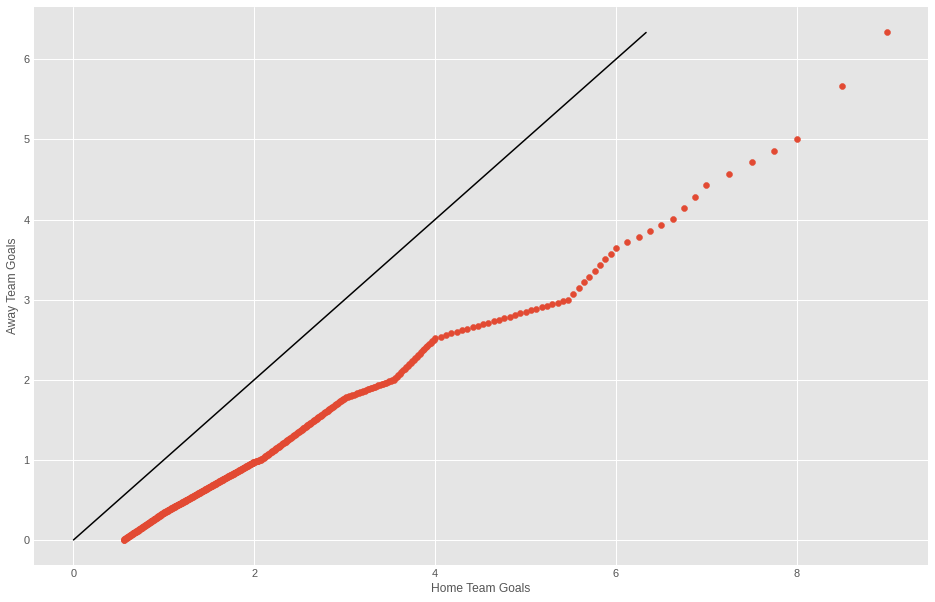

In [201]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme. 

pplot(matches, x="Home Team Goals", y="Away Team Goals", kind='qq', display_kws={"identity":True}) # qqplot the Home team goals as x and away team goals as y, add an identity line for ease of reading
fig = plt.gcf() # Get the figure
fig.set_size_inches(18.5, 10.5) # Set the figure size to 18.5 by 10.5


The Home team goals is significantly more than away team goals, it seems that when a home team hits 4 goals they might be discouraging the enemy team more than other times?